<a href="https://colab.research.google.com/github/reyhanalemmario/bangkit/blob/master/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Machine Learning Bangkit Project
##"Heart Attack Prediction"
###By Rizal, Rinda and Reyhan
---
* This notebook file contains step-by-step process in solving Binary Classification problem in order to predict that someone actually has potential of getting heart attack or not by looking at Cardio column in the dataset.

* The dataset that we are using is from https://www.kaggle.com/sulianova/cardiovascular-disease-dataset, The desription of each feature is available in that link.

* In this notebook we are trying to predict that binary value column by looking at another features in the dataset.

## Load the imports

In [0]:
#Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import sklearn.model_selection as sk
from math import floor

## Introduction to the Data

### Load the dataset

In [114]:
# Load the dataset
url = 'https://raw.githubusercontent.com/reyhanalemmario/bangkit/master/cardio.csv'
data = pd.read_csv(url, sep=';', index_col='id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


There are 13 columns in this dataset, we are going to examine this columns in more detail. And notice that age column have a huge value, that's because the age unit is in days, we are going to convert that.

### Convert column age's values

In [115]:
data["age"] = data["age"]/365
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


### Data Information

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


Every features, but weight has int data type and weight feature has float data type. So, we can continue to analyze this dataset because we have a proper data type. And last thing to notice is we don't have null values in this dataset.

### Data Description

In [117]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Data Examination and Cleaning

### Check and Remove Duplication

In [118]:
print("Number of duplicated values in dataset: {}".format(data.duplicated().sum()))

Number of duplicated values in dataset: 24


See the first duplicated data

In [119]:
duplicated = data[data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
3774,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
65352,60.484932,1,175,69.0,120,80,1,1,0,0,1,1


Remove the duplicated data

In [120]:
# Remove the duplicated data
data.drop_duplicates(inplace=True)
print("The duplicated data is successfully removed")
print("Number of duplicated values in dataset: {}".format(data.duplicated().sum()))

The duplicated data is successfully removed
Number of duplicated values in dataset: 0


### Total rows of each label

0    35004
1    34972
Name: cardio, dtype: int64


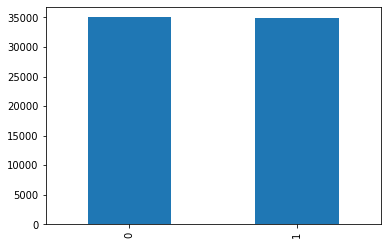

In [121]:
print(data['cardio'].value_counts())
data["cardio"].value_counts().plot(kind="bar")

As we can see, the total number of rows of each label is almost the same. This dataset have balanced dataset

### Finding anomalies

In [122]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.339589,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.759930,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Based on the data description, there are some anomalies in the dataset, where the min and max values are unusual. 

1.   Height
2.   Weight
3.   ap_hi
4.   ap_lo

For ap_hi, we have an assumption that the possible values are between 0 and 370.
For ap_lo, we have an assumption that the possible values are between 0 and 360.

We are going to examine them later.



## Manipulating Data

### Systolic blood pressure (ap_hi)

Based on this [source](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/blood_pressure_charts/basic_blood_pressure_chart.png), the ap_hi values is ranging from less than 120 until higher than 180. But, the possible ap_hi values that human have will be around 0-370 and that will be our assumptions for this task to set our boundaries

Set the boundary constant for both ap_hi and ap_lo

In [0]:
hi_upper_bound = 370
lo_upper_bound = 360

In [124]:
data.sort_values(["ap_hi"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
50055,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1
34295,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1
66571,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0
36025,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1
22881,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0
6525,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0
29313,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0
60477,51.276712,1,171,80.0,1,1088,1,1,0,0,1,1
12494,46.315068,2,163,63.0,1,2088,1,1,1,0,1,0


There are negative values for ap_hi, and based on our assumptions, there are human errors when the user input this data, where the value is supposed to be positive. So we will convert the negative values with the absolute values of it.

#### Convert the negative values

In [125]:
data['ap_hi'] = abs(data['ap_hi'])
data.sort_values(["ap_hi"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
12494,46.315068,2,163,63.0,1,2088,1,1,1,0,1,0
60477,51.276712,1,171,80.0,1,1088,1,1,0,0,1,1
7657,58.191781,1,162,69.0,7,80,1,1,0,0,1,0
89703,50.284932,1,155,79.0,10,70,1,1,0,0,1,0
82646,44.257534,1,165,56.0,10,60,1,1,0,0,1,0
29827,53.487671,1,155,55.0,10,60,1,1,0,0,0,0
3683,64.232877,1,170,64.0,10,70,1,1,0,0,1,1
41674,41.917808,1,155,52.0,10,70,1,1,0,0,1,0
94673,61.783562,1,169,88.0,10,160,3,3,0,0,0,1


The negative values are successfully converted because the lowest value does not have any negative values anymore

#### Remove some rows that makes no sense

Other than that, there are still ap_hi values that does not make sense. For example, there are rows where ap_hi values are 1 and the ap_lo is extremely high, which is thousands. So we will remove those rows

In [126]:
# Remove rows with ap_hi values = 1

data = data[data.ap_hi != 1]
data.sort_values(["ap_hi"], ascending=True).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
7657,58.191781,1,162,69.0,7,80,1,1,0,0,1,0
81051,50.249315,1,160,80.0,10,80,1,1,0,0,1,1
94673,61.783562,1,169,88.0,10,160,3,3,0,0,0,1
89703,50.284932,1,155,79.0,10,70,1,1,0,0,1,0
29827,53.487671,1,155,55.0,10,60,1,1,0,0,0,0


#### Manipulate ap_hi values that are out of bound

In [127]:
subset = data[data['ap_hi'] > hi_upper_bound]
subset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
2654,41.413699,1,160,60.0,902,60,1,1,0,0,1,0
2845,62.224658,2,167,59.0,906,0,1,1,0,0,1,0
6822,39.520548,1,168,63.0,909,60,2,1,0,0,1,0
11089,57.621918,1,175,80.0,11500,90,1,1,0,0,1,1
12710,51.698630,1,164,75.0,1420,80,2,1,0,0,1,1
13616,62.079452,1,155,87.0,701,110,1,1,0,0,1,1
19827,43.824658,1,168,72.0,1500,80,1,1,0,0,1,1
25314,61.364384,2,163,50.0,907,70,3,3,0,0,1,1
34120,44.194521,1,161,92.0,906,0,2,1,0,0,1,1


In [128]:
len(subset)

39

there are ap_hi values that are higher than the upper boundary for ap_hi, which is 370. Based on our observations, those values, if divided by 10 or 100, still makes sense if it is partnered with ap_lo values, so we are going to divide them by 10 or 100 until the value is below 370

In [129]:
for index, row in data[data['ap_hi'] > hi_upper_bound].iterrows():
    while (data['ap_hi'].loc[index] > hi_upper_bound):
        data['ap_hi'].loc[index] = data['ap_hi'].loc[index]/10


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [130]:
data[data['ap_hi'] > hi_upper_bound]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


The values that are out of bound are fixed

### Diastolic blood pressure (ap_lo)

Based on this [source](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/blood_pressure_charts/basic_blood_pressure_chart.png), the ap_lo values are ranging from less than 80 until higher than 120. But, the possible ap_hi values that human have will be around 0-360 and that will be our assumptions for this task to set our boundaries

In [131]:
data.sort_values(["ap_lo"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
85816,61.838356,1,167,74.0,15.0,-70,1,1,0,0,1,1
65470,53.690411,2,165,70.0,140.0,0,3,1,1,0,1,0
39577,64.098630,2,180,73.0,140.0,0,1,1,1,1,1,1
60565,49.282192,2,176,69.0,90.6,0,1,1,0,0,1,0
36325,49.183562,2,176,73.0,12.0,0,1,1,0,0,1,0
45400,44.027397,1,170,64.0,90.7,0,1,1,0,0,1,0
75007,60.052055,1,155,66.0,13.0,0,1,1,0,0,1,0
32749,58.032877,2,166,68.0,149.0,0,1,1,0,0,1,1
91073,40.334247,2,161,61.0,117.0,0,1,1,0,0,1,0


#### Convert the negative values

In [132]:
data['ap_lo'] = abs(data['ap_lo'])
data.sort_values(["ap_lo"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
65470,53.690411,2,165,70.0,140.0,0,3,1,1,0,1,0
93224,64.690411,2,176,99.0,120.0,0,1,3,0,0,1,1
91073,40.334247,2,161,61.0,117.0,0,1,1,0,0,1,0
57646,55.676712,1,162,50.0,309.0,0,1,1,0,0,1,0
54780,63.583562,2,170,81.0,148.0,0,1,1,0,0,1,0
62754,51.512329,1,164,78.0,108.0,0,2,1,0,0,1,0
68612,52.087671,1,160,84.0,121.0,0,1,1,0,0,0,1
45400,44.027397,1,170,64.0,90.7,0,1,1,0,0,1,0
34120,44.194521,1,161,92.0,90.6,0,2,1,0,0,1,1


In [133]:
data.sort_values(["ap_lo"], ascending=False).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
61901,63.619178,1,160,105.0,200.0,11000,1,1,0,0,1,1
3352,57.517808,2,186,105.0,140.0,10000,1,1,0,0,1,1
34098,49.594521,2,169,86.0,150.0,10000,2,2,0,1,1,1
97907,52.224658,1,166,70.0,160.0,10000,2,1,0,0,1,1
62058,60.016438,2,179,62.0,130.0,9800,1,1,0,0,1,0
9482,53.501370,1,162,69.0,130.0,9100,1,1,0,0,1,1
17260,58.810959,2,169,78.0,130.0,9011,1,1,1,1,1,1
47030,50.232877,1,156,65.0,150.0,9011,2,2,0,0,1,1
22832,39.747945,2,179,70.0,120.0,8500,1,1,0,0,1,0


#### Manipulate ap_lo values that are out of bound

In [134]:
subset_lo = data[data['ap_lo'] > lo_upper_bound]
subset_lo.sort_values(["ap_lo"], ascending=False).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
61901,63.619178,1,160,105.0,200.0,11000,1,1,0,0,1,1
97907,52.224658,1,166,70.0,160.0,10000,2,1,0,0,1,1
34098,49.594521,2,169,86.0,150.0,10000,2,2,0,1,1,1
3352,57.517808,2,186,105.0,140.0,10000,1,1,0,0,1,1
62058,60.016438,2,179,62.0,130.0,9800,1,1,0,0,1,0
9482,53.501370,1,162,69.0,130.0,9100,1,1,0,0,1,1
17260,58.810959,2,169,78.0,130.0,9011,1,1,1,1,1,1
47030,50.232877,1,156,65.0,150.0,9011,2,2,0,0,1,1
22832,39.747945,2,179,70.0,120.0,8500,1,1,0,0,1,0


there are ap_lo values that are higher than the upper boundary for ap_lo, which is 360. Based on our observations, those values, if divided by 10 or 100, still makes sense if it is partnered with ap_hi values, so we are going to divide them by 10 or 100 until the value is below 360

In [135]:
for index, row in data[data['ap_lo'] > lo_upper_bound].iterrows():
    while (data['ap_lo'].loc[index] > lo_upper_bound):
        data['ap_lo'].loc[index] = data['ap_lo'].loc[index]/10

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [136]:
data[data['ap_lo'] > lo_upper_bound]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


The out-of-bound values are fixed

In [137]:
data.loc[61901]

age             63.619178
gender           1.000000
height         160.000000
weight         105.000000
ap_hi          200.000000
ap_lo          110.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
cardio           1.000000
Name: 61901, dtype: float64

#### Remove rows where ap_lo is higher than ap_hi

Because it is impossible to have ap_lo that is higher than ap_hi

In [138]:
data.drop(data[data["ap_lo"] > data["ap_hi"]].index, inplace=True)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,2,168,76.0,120.0,80.0,1,1,1,0,1,0
99995,61.920548,1,158,126.0,140.0,90.0,2,2,0,0,1,1
99996,52.235616,2,183,105.0,180.0,90.0,3,1,0,1,0,1


The rows where the ap_lo value is higher that ap_hi is successfully removed

In [139]:
data[data["ap_lo"] > data["ap_hi"]]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


### Height

In [140]:
# data = data.sort_values(["height"], ascending=False)
data.sort_values(["height"], ascending=False).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9223,58.136986,1,250,86.0,140.0,100.0,3,1,0,0,1,1
30894,52.202740,2,207,78.0,100.0,70.0,1,1,0,1,1,0
59847,52.567123,2,200,100.0,170.0,110.0,2,2,0,0,1,1
77425,58.673973,2,198,110.0,140.0,80.0,2,3,0,0,1,1
94422,61.750685,1,198,80.0,140.0,90.0,1,2,0,0,1,1


We have one person that has 250 cm height, We think, it is possible but we don't want out model get affected by this outlier.

In [141]:
# data = data[1:] #Remove that one outlier
data = data[data.height != 250]
data.sort_values(["height"], ascending=False).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
30894,52.202740,2,207,78.0,100.0,70.0,1,1,0,1,1,0
59847,52.567123,2,200,100.0,170.0,110.0,2,2,0,0,1,1
4561,44.032877,2,198,61.0,110.0,70.0,1,1,0,0,1,1
94422,61.750685,1,198,80.0,140.0,90.0,1,2,0,0,1,1
82105,51.572603,2,198,78.0,120.0,80.0,1,1,1,0,1,1


### Weight

In [142]:
data.sort_values(["height"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
32456,64.071233,1,55,81.0,130.0,90.0,1,1,0,0,1,1
95141,51.589041,1,57,61.0,130.0,90.0,1,1,0,0,1,1
91523,50.482192,1,59,57.6,125.0,67.0,1,1,0,0,0,0
41661,52.295890,1,60,69.0,110.0,70.0,1,1,0,0,0,0
39462,57.473973,1,64,61.0,130.0,70.0,1,1,0,0,1,0
63545,52.383562,1,65,60.0,120.0,80.0,1,1,0,0,1,0
48009,53.997260,2,65,72.0,130.0,80.0,1,1,0,0,0,0
76116,56.276712,2,67,80.0,120.0,80.0,1,1,0,0,0,1
72476,39.723288,2,67,60.0,110.0,80.0,1,1,1,1,1,0


It turns out that the weight values are normal, so we are not going to manipulate them

### BMI: Add new feature

We are not really sure about people that has more weight in Kg than height in Cm. So we are going to add one more feature, BMI and we have to look to this [source](https://www.webmd.com/diet/news/20070409/morbid-obesity-bulge-gets-bigger) and filter this data based on that source. Notice that BMI has fix unit kg/m2, so we convert the height unit first and we choose Max value of BMI is 70 because it says extreme obese people has 50 or more. We assume that more than 70 BMI has an invalid values. And base on this [source](https://www.ennonline.net/fex/15/limits), it says fatal value 13 for male and 11 for female, so we choose minimum value of 12.

In [143]:
data["height"] = data["height"]/100 # Convert the height unit

data['BMI'] = data["weight"]/data["height"]**2
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.391781,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.967120
1,55.419178,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.927679
2,51.663014,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1,23.507805
3,48.282192,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.710479
4,47.873973,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0,23.011177


In [144]:
#Filtering the acceptable BMI values
data = data[data["BMI"] <= 70]
data = data[data["BMI"] >= 12]
data.sort_values(["BMI"], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
4838,39.769863,1,1.00,70.0,100.0,70.0,1,1,0,0,1,0,70.000000
52564,53.780822,1,1.61,181.0,180.0,110.0,2,1,0,0,1,1,69.827553
96921,59.624658,1,1.33,123.0,180.0,100.0,2,1,0,0,1,1,69.534739
58175,59.528767,1,1.54,162.0,120.0,80.0,1,1,0,0,1,0,68.308315
27063,42.249315,1,1.55,163.0,180.0,100.0,1,1,0,0,1,1,67.845994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14908,60.293151,1,1.62,38.0,100.0,70.0,1,1,0,0,1,0,14.479500
13518,57.419178,2,1.72,40.0,140.0,90.0,1,2,0,0,1,1,13.520822
54851,59.750685,1,1.54,32.0,110.0,60.0,1,1,0,0,1,0,13.493001


In [145]:
data.sort_values(["weight"], ascending=False).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
71945,41.416438,2,1.80,200.0,150.0,90.0,1,1,0,0,1,1,61.728395
618,45.931507,1,1.86,200.0,130.0,70.0,1,1,0,0,0,0,57.810151
87498,57.367123,2,1.80,183.0,110.0,80.0,3,3,0,1,1,1,56.481481
52564,53.780822,1,1.61,181.0,180.0,110.0,2,1,0,0,1,1,69.827553
87612,45.520548,2,1.96,180.0,130.0,80.0,3,1,0,0,1,1,46.855477
86506,51.986301,2,1.80,180.0,140.0,100.0,3,1,0,0,1,1,55.555556
64829,47.720548,2,1.90,180.0,140.0,80.0,2,2,0,0,1,1,49.861496
6716,47.172603,2,1.76,180.0,140.0,90.0,1,1,0,0,1,1,58.109504
28683,56.591781,2,1.65,178.0,120.0,80.0,1,1,1,1,1,0,65.381084


At first sight, we thought that 200 Kg is unusual but, there is a few people that has weight in that number. And look at cardio values, maybe this column will be a good feature to feed into machine learning. Now, all is good.

## Normalizing Data
To make training process more feasible, we normalize the data so the value of the features doesn't really have a significant difference.

In [146]:
data_mean = data.mean()
data_std = data.std()
data_norm = (data - data_mean)/data_std
#Cardio and gender column get affected so we replace that value with pre-normilize value
data_norm = data_norm.drop(columns='cardio')
data_norm = data_norm.drop(columns='gender')
data_norm['gender'] = data['gender']
data_norm['cardio'] = data['cardio']
data_norm.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,gender,cardio
id,,,,,,,,,,,,,
0,-0.436271,0.451655,-0.850141,-0.999034,-0.153269,-0.539710,-0.395676,-0.311014,-0.23784,0.494026,-1.046317,2,0
1,0.307426,-1.053132,0.752430,0.758485,0.854163,2.398865,-0.395676,-0.311014,-0.23784,0.494026,1.405848,1,1
2,-0.248219,0.075458,-0.710787,0.172645,-1.160702,2.398865,-0.395676,-0.311014,-0.23784,-2.024155,-0.754816,1,1
3,-0.748341,0.577054,0.543399,1.344325,1.861596,-0.539710,-0.395676,-0.311014,-0.23784,0.494026,0.229541,2,1
4,-0.808728,-1.053132,-1.268203,-1.584874,-2.168134,-0.539710,-0.395676,-0.311014,-0.23784,-2.024155,-0.848780,1,0


## Plot Features

### Heatmap

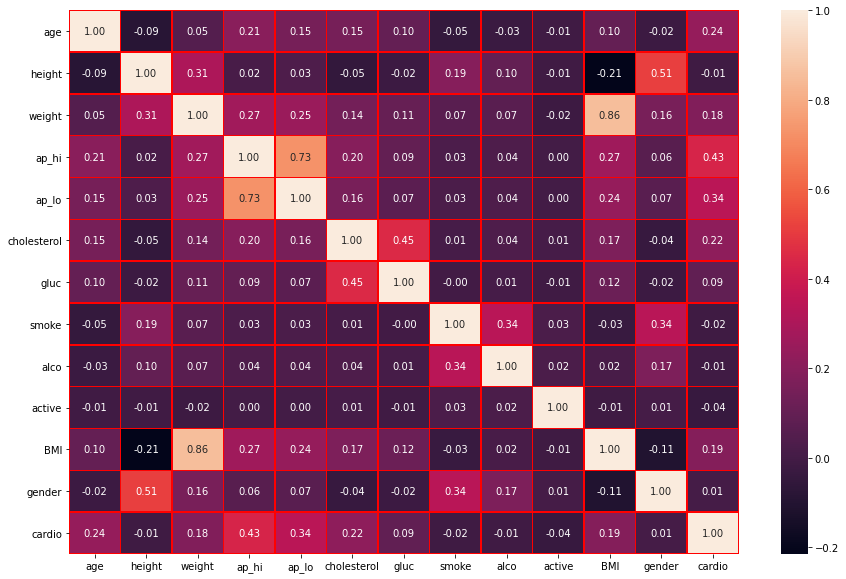

In [147]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_norm.corr(),annot=True,linewidth=0.5,linecolor='red', fmt = '.2f',ax=ax)
plt.show()

There are some features that has more than 0.2 correlation value to the label(cardio), which is age, ap_hi, ap_lo, and cholesterol. And notice, at first height value doesn't really have a connection to the result but when we create BMI column, height value have a connection through BMI value.

### Plot between ap_hi and ap_lo

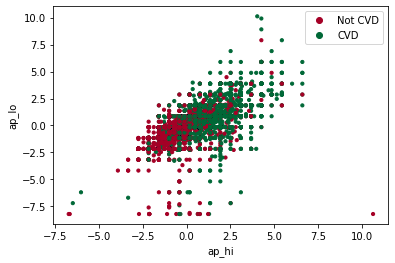

In [148]:
scatter = plt.scatter(data_norm['ap_hi'], data_norm['ap_lo'], alpha=1,
            s=10, c=data_norm['cardio'], cmap='RdYlGn', edgecolors='face')

plt.legend(handles=scatter.legend_elements()[0], labels=['Not CVD','CVD'])
            
plt.xlabel("ap_hi")
plt.ylabel("ap_lo");

## Define a plotting function

In [184]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()
  plt.title("Training and Validation")

print("Defined the plot_curve function.")

Defined the plot_curve function.


## Split data for training and test

*   training: 80%
*   test: 20%
*   validation (default): 10% dari set training

the splitting is done after it is shuffled


In [150]:
data_norm.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,gender,cardio
id,,,,,,,,,,,,,
0,-0.436271,0.451655,-0.850141,-0.999034,-0.153269,-0.539710,-0.395676,-0.311014,-0.23784,0.494026,-1.046317,2,0
1,0.307426,-1.053132,0.752430,0.758485,0.854163,2.398865,-0.395676,-0.311014,-0.23784,0.494026,1.405848,1,1
2,-0.248219,0.075458,-0.710787,0.172645,-1.160702,2.398865,-0.395676,-0.311014,-0.23784,-2.024155,-0.754816,1,1
3,-0.748341,0.577054,0.543399,1.344325,1.861596,-0.539710,-0.395676,-0.311014,-0.23784,0.494026,0.229541,2,1
4,-0.808728,-1.053132,-1.268203,-1.584874,-2.168134,-0.539710,-0.395676,-0.311014,-0.23784,-2.024155,-0.848780,1,0


In [151]:
len(data_norm)

69649

20% test

In [152]:
train, test = np.split(data_norm.sample(frac=1),[int(.8*len(data_norm))])
print(len(train)) #0.8
print(len(test)) # 0.2

55719
13930


30% test
uncomment below if you want to use this set

In [0]:
# train, test = np.split(data_norm.sample(frac=1),[int(.7*len(data_norm))])
# print(len(train)) #0.7
# print(len(test)) # 0.3

## Define models (Logistic Regression)
for experiment, we build 4 model using logistic regression with various feature columns

### Build Simple Classification Model using Logistic Regression

one layer with one node

In [176]:
# source: binary classification MLCC, logistic regression MLCC
def build_model_simple_classification(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Describe the topography of the model.
  # Funnel the regression value through a sigmoid function
  # this model has a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model   

def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, 
                      validation_split=my_validation_split)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


### Model 1 Experiment

#### Model 1: Feature Columns

for now, the features are ap_hi and ap_lo. using raw normalized values

In [155]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# Create a numerical feature column to represent median_income.
median_income = tf.feature_column.numeric_column("ap_hi")
feature_columns.append(median_income)

# Create a numerical feature column to represent total_rooms.
tr = tf.feature_column.numeric_column("ap_lo")
feature_columns.append(tr)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = layers.DenseFeatures(feature_columns)

# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:
feature_layer(dict(data_norm))

<tf.Tensor: shape=(69649, 2), dtype=float32, numpy=
array([[-0.9990344 , -0.15326917],
       [ 0.7584852 ,  0.8541633 ],
       [ 0.17264532, -1.1607016 ],
       ...,
       [ 3.1018445 ,  0.8541633 ],
       [ 0.46556523, -0.15326917],
       [-0.41319454, -0.15326917]], dtype=float32)>

#### Model 1: Training

I only tuned the learning rate and classification threshold. this is my best result. feel free to tweak it

Epoch 1/50
502/502 [==============================] - 1s 3ms/step - loss: 0.5973 - accuracy: 0.6981 - precision: 0.7880 - recall: 0.5413 - auc: 0.7454 - val_loss: 0.5976 - val_accuracy: 0.6945 - val_precision: 0.7915 - val_recall: 0.5391 - val_auc: 0.7479
Epoch 2/50
502/502 [==============================] - 1s 2ms/step - loss: 0.5957 - accuracy: 0.6986 - precision: 0.7880 - recall: 0.5428 - auc: 0.7457 - val_loss: 0.5961 - val_accuracy: 0.6954 - val_precision: 0.7920 - val_recall: 0.5409 - val_auc: 0.7481
Epoch 3/50
502/502 [==============================] - 1s 2ms/step - loss: 0.5944 - accuracy: 0.6988 - precision: 0.7881 - recall: 0.5431 - auc: 0.7477 - val_loss: 0.5948 - val_accuracy: 0.6954 - val_precision: 0.7920 - val_recall: 0.5409 - val_auc: 0.7505
Epoch 4/50
502/502 [==============================] - 1s 2ms/step - loss: 0.5933 - accuracy: 0.6990 - precision: 0.7882 - recall: 0.5434 - auc: 0.7498 - val_loss: 0.5937 - val_accuracy: 0.6954 - val_precision: 0.7920 - val_recall: 0

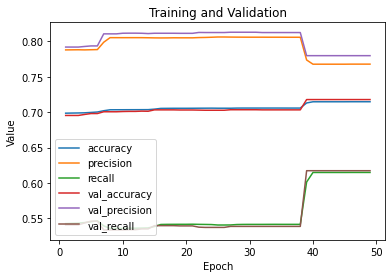

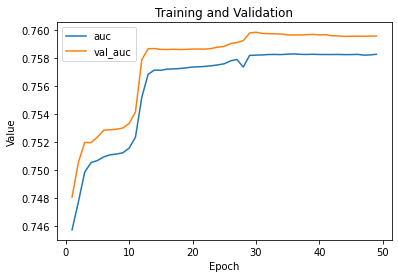

In [188]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 100
label_name = "cardio"
classification_threshold = 0.55
my_validation_split = 0.1

# Establish the metrics the model will measure.
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
            tf.keras.metrics.Precision(thresholds=classification_threshold,
                                        name='precision' 
                                        ),
            tf.keras.metrics.Recall(thresholds=classification_threshold, 
                                    name='recall',),
            tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
          ]

# Establish the model's topography.
my_model = build_model_simple_classification(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train, epochs, 
                           label_name, batch_size, my_validation_split)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy', "precision", "recall", "val_accuracy", "val_precision", "val_recall"]

plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['auc', 'val_auc'])

#### Model 1 Testing

In [189]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

140/140 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7111 - precision: 0.7608 - recall: 0.6106 - auc: 0.7508


[0.5932806134223938,
 0.7111270427703857,
 0.7607560753822327,
 0.6106054186820984,
 0.75083327293396]

### Model 2 Experiment

#### Model 2: Feature Columns

using the Bucketize ap_hi and ap_lo values

In [190]:
resolution_in_degrees = 1.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns_2 = []

# Create a bucket feature column for ap_hi.
ap_hi_as_a_numeric_column = tf.feature_column.numeric_column("ap_hi")
ap_hi_boundaries = list(np.arange(int(min(train['ap_hi'])), 
                                     int(max(train['ap_hi'])), 
                                     resolution_in_degrees))
print("ap_hi")
print(ap_hi_boundaries)
ap_hi = tf.feature_column.bucketized_column(ap_hi_as_a_numeric_column, 
                                               ap_hi_boundaries)
print(ap_hi)

feature_columns_2.append(ap_hi)

# Create a bucket feature column for ap_lo.
ap_lo_as_a_numeric_column = tf.feature_column.numeric_column("ap_lo")
ap_lo_boundaries = list(np.arange(int(min(train['ap_lo'])), 
                                      int(max(train['ap_lo'])), 
                                      resolution_in_degrees))

print("ap_lo")
print(ap_lo_boundaries)
ap_lo = tf.feature_column.bucketized_column(ap_lo_as_a_numeric_column, 
                                                ap_lo_boundaries)

print(ap_lo)

feature_columns_2.append(ap_lo)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer = layers.DenseFeatures(feature_columns_2)

ap_hi
[-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5]
BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5))
ap_lo
[-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5]
BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))


#### Model 2: Training

Epoch 1/50
502/502 [==============================] - 2s 3ms/step - loss: 0.6588 - accuracy: 0.5333 - precision: 0.8244 - recall: 0.0836 - auc: 0.6573 - val_loss: 0.6551 - val_accuracy: 0.5239 - val_precision: 0.7852 - val_recall: 0.0829 - val_auc: 0.6621
Epoch 2/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.5339 - precision: 0.8239 - recall: 0.0852 - auc: 0.6647 - val_loss: 0.6448 - val_accuracy: 0.5240 - val_precision: 0.7860 - val_recall: 0.0832 - val_auc: 0.6742
Epoch 3/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6399 - accuracy: 0.5436 - precision: 0.8292 - recall: 0.1087 - auc: 0.6950 - val_loss: 0.6363 - val_accuracy: 0.5441 - val_precision: 0.8124 - val_recall: 0.1304 - val_auc: 0.7171
Epoch 4/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6324 - accuracy: 0.6060 - precision: 0.7762 - recall: 0.2968 - auc: 0.7135 - val_loss: 0.6289 - val_accuracy: 0.6866 - val_precision: 0.7659 - val_recall: 0

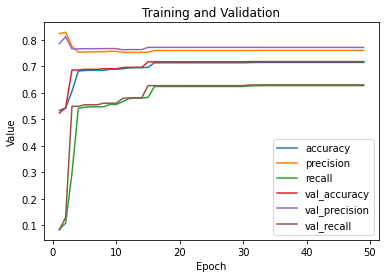

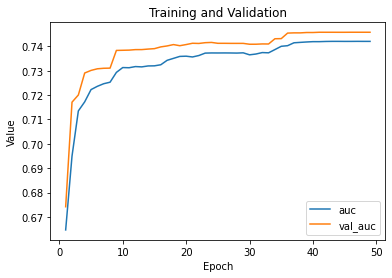

In [192]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 100
label_name = "cardio"
classification_threshold = 0.6
my_validation_split = 0.1

# Establish the metrics the model will measure.
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
            tf.keras.metrics.Precision(thresholds=classification_threshold,
                                        name='precision' 
                                        ),
            tf.keras.metrics.Recall(thresholds=classification_threshold, 
                                    name='recall',),
            tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
          ]

# Establish the model's topography.
my_model_2 = build_model_simple_classification(learning_rate, buckets_feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model_2, train, epochs, 
                           label_name, batch_size, my_validation_split)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy', "precision", "recall", "val_accuracy", "val_precision", "val_recall"]

plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['auc', 'val_auc'])

#### Model 2: Testing

In [193]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model_2.evaluate(x = features, y = label, batch_size=batch_size)

140/140 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7109 - precision: 0.7544 - recall: 0.6200 - auc: 0.7364


[0.5909169912338257,
 0.7109116911888123,
 0.7543952465057373,
 0.6199970841407776,
 0.7363557815551758]

### Model 3 Experiment

3 features: ap_hi, ap_lo, feature cross of ap_hi and ap_lo

#### Model 3: Feature columns
features: ap_hi, ap_lo, feature cross of ap_hi and ap_lo

ada feature cross

In [162]:
resolution_in_degrees = 1.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns_3 = []

# Create a bucket feature column for ap_hi.
ap_hi_as_a_numeric_column = tf.feature_column.numeric_column("ap_hi")
ap_hi_boundaries = list(np.arange(int(min(train['ap_hi'])), 
                                     int(max(train['ap_hi'])), 
                                     resolution_in_degrees))
print("ap_hi")
print(ap_hi_boundaries)
ap_hi = tf.feature_column.bucketized_column(ap_hi_as_a_numeric_column, 
                                               ap_hi_boundaries)
print(ap_hi)

feature_columns_3.append(ap_hi)

# Create a bucket feature column for ap_lo.
ap_lo_as_a_numeric_column = tf.feature_column.numeric_column("ap_lo")
ap_lo_boundaries = list(np.arange(int(min(train['ap_lo'])), 
                                      int(max(train['ap_lo'])), 
                                      resolution_in_degrees))

print("ap_lo")
print(ap_lo_boundaries)
ap_lo = tf.feature_column.bucketized_column(ap_lo_as_a_numeric_column, 
                                                ap_lo_boundaries)

print(ap_lo)

feature_columns_3.append(ap_lo)

# Create a feature cross of ap_hi and ap_lo.
hi_x_lo = tf.feature_column.crossed_column([ap_hi, ap_lo], hash_bucket_size=96)
crossed_feature = tf.feature_column.indicator_column(hi_x_lo)
feature_columns_3.append(crossed_feature)

print("crossed")
print(crossed_feature)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer_cross = layers.DenseFeatures(feature_columns_3)

ap_hi
[-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5]
BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5))
ap_lo
[-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5]
BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))
crossed
IndicatorColumn(categorical_column=CrossedColumn(keys=(BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5)), BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))), hash_bucket_size=96, h

#### Model 3 Training

Epoch 1/50
502/502 [==============================] - 2s 3ms/step - loss: 0.6755 - accuracy: 0.5005 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6890 - val_loss: 0.6654 - val_accuracy: 0.4934 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7269
Epoch 2/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6575 - accuracy: 0.5072 - precision: 0.8272 - recall: 0.0170 - auc: 0.7296 - val_loss: 0.6484 - val_accuracy: 0.5165 - val_precision: 0.7919 - val_recall: 0.0620 - val_auc: 0.7372
Epoch 3/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6423 - accuracy: 0.5264 - precision: 0.8295 - recall: 0.0654 - auc: 0.7327 - val_loss: 0.6340 - val_accuracy: 0.5165 - val_precision: 0.7919 - val_recall: 0.0620 - val_auc: 0.7378
Epoch 4/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6298 - accuracy: 0.5545 - precision: 0.7797 - recall: 0.1507 - auc: 0.7332 - val_loss: 0.6221 - val_accuracy: 0.6805 - val_precision: 0.7651

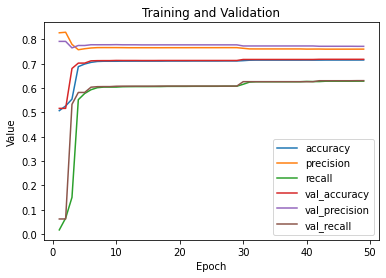

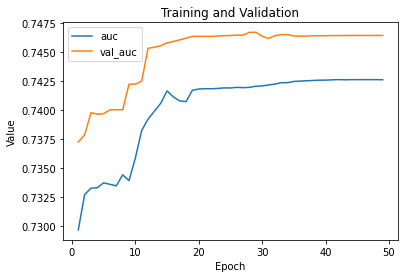

In [194]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 100
label_name = "cardio"
classification_threshold = 0.6
my_validation_split = 0.1

# Establish the metrics the model will measure.
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
            tf.keras.metrics.Precision(thresholds=classification_threshold,
                                        name='precision' 
                                        ),
            tf.keras.metrics.Recall(thresholds=classification_threshold, 
                                    name='recall',),
            tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
          ]

# Establish the model's topography.
my_model_3 = build_model_simple_classification(learning_rate, buckets_feature_layer_cross, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model_3, train, epochs, 
                           label_name, batch_size, my_validation_split)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy', "precision", "recall", "val_accuracy", "val_precision", "val_recall"]

plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['auc', 'val_auc'])

#### Model 3: Testing

In [195]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model_3.evaluate(x = features, y = label, batch_size=batch_size)

140/140 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7108 - precision: 0.7541 - recall: 0.6203 - auc: 0.7374


[0.5897955298423767,
 0.7108399271965027,
 0.7540839910507202,
 0.6202861070632935,
 0.7373692393302917]

### Model 4 Experiment
2 feature: BMI and feature cross of ap_hi and ap_lo

#### Model 4: Feature Columns

BMI and feature cross of ap_hi x ap_lo

If we just use BMI and cross ap_lo-ap_hi

In [203]:
resolution_in_degrees = 1.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns_4 = []

# Create a bucket for ap_hi.
ap_hi_as_a_numeric_column = tf.feature_column.numeric_column("ap_hi")
ap_hi_boundaries = list(np.arange(int(min(train['ap_hi'])), 
                                     int(max(train['ap_hi'])), 
                                     resolution_in_degrees))
print("ap_hi")
print(ap_hi_boundaries)
ap_hi = tf.feature_column.bucketized_column(ap_hi_as_a_numeric_column, 
                                               ap_hi_boundaries)
print(ap_hi)

# Create a bucket for ap_lo.
ap_lo_as_a_numeric_column = tf.feature_column.numeric_column("ap_lo")
ap_lo_boundaries = list(np.arange(int(min(train['ap_lo'])), 
                                      int(max(train['ap_lo'])), 
                                      resolution_in_degrees))

print("ap_lo")
print(ap_lo_boundaries)
ap_lo = tf.feature_column.bucketized_column(ap_lo_as_a_numeric_column, 
                                                ap_lo_boundaries)

print(ap_lo)

# Create a feature cross of ap_hi and ap_lo.
hi_x_lo = tf.feature_column.crossed_column([ap_hi, ap_lo], hash_bucket_size=96)
crossed_feature = tf.feature_column.indicator_column(hi_x_lo)
feature_columns_4.append(crossed_feature)

print("crossed")
print(crossed_feature)

# Create a feature column of BMI
resolution_in_degrees_BMI = 1.0
bmi_as_a_numeric_column = tf.feature_column.numeric_column("BMI")
bmi_boundaries = list(np.arange(int(min(train['BMI'])), 
                                      int(max(train['BMI'])), 
                                      resolution_in_degrees_BMI))

print("BMI")
print(bmi_boundaries)
bmi = tf.feature_column.bucketized_column(bmi_as_a_numeric_column, 
                                                bmi_boundaries)

print(bmi)
feature_columns_4.append(bmi)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer_crossbmi = layers.DenseFeatures(feature_columns_4)

ap_hi
[-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5]
BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5))
ap_lo
[-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5]
BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))
crossed
IndicatorColumn(categorical_column=CrossedColumn(keys=(BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5)), BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))), hash_bucket_size=96, h

#### Model 4: Training

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

502/502 [==============================] - 2s 3ms/step - loss: 0.6901 - accuracy: 0.5017 - precision: 0.8333 - recall: 0.0032 - auc: 0.5829 - val_loss: 0.6852 - val_accuracy: 0.4968 - val_precision: 0.8800 - val_recall: 0.0078 - val_auc: 0.6257
Epoch 2/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6795 - accuracy: 0.5046 - precision: 0.8245 - recall: 0.0105 - auc: 0.6371 - val_loss: 0.6749 - val_accuracy: 0.5041 - val_precision: 0.8488 - val_recall: 0.0259 - val_auc: 0.6

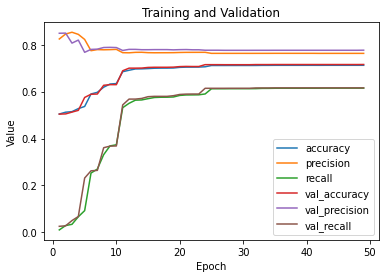

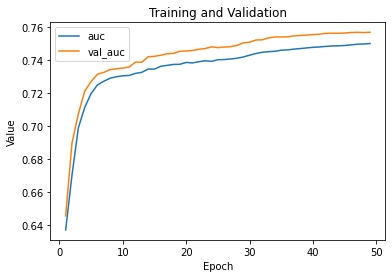

In [204]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 100
label_name = "cardio"
classification_threshold = 0.6
my_validation_split = 0.1

# Establish the metrics the model will measure.
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
            tf.keras.metrics.Precision(thresholds=classification_threshold,
                                        name='precision' 
                                        ),
            tf.keras.metrics.Recall(thresholds=classification_threshold, 
                                    name='recall',),
            tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
          ]

# Establish the model's topography.
my_model_4 = build_model_simple_classification(learning_rate, buckets_feature_layer_crossbmi, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model_4, train, epochs, 
                           label_name, batch_size, my_validation_split)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy', "precision", "recall", "val_accuracy", "val_precision", "val_recall"]

plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['auc', 'val_auc'])

#### Model 4: Testing

In [197]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model_4.evaluate(x = features, y = label, batch_size=batch_size)

140/140 [==============================] - 1s 5ms/step - loss: 0.5873 - accuracy: 0.7088 - precision: 0.7580 - recall: 0.6079 - auc: 0.7488


[0.5872735977172852,
 0.7087580561637878,
 0.7580180168151855,
 0.6078601479530334,
 0.7488025426864624]

## Define models using neural network

### Build NN model

3 hidden layers
hidden layer 1: 10 unit
hidden layer 2: 8 unit
hidden layer 3: 8 unit
output layer: 1 unit with sigmoid activation

In [201]:
# source: binary classification MLCC, linear regression MLCC
def build_model_NN_classification(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer.

  # Define the first hidden layer 
  model.add(tf.keras.layers.Dense(units=10, 
                                  activation='relu', 
                                  name='Hidden1'))
  
  # Define the second hidden layer
  model.add(tf.keras.layers.Dense(units=8, 
                                  activation='relu', 
                                  name='Hidden2'))
   # Define the third hidden layer
  model.add(tf.keras.layers.Dense(units=8, 
                                  activation='relu', 
                                  name='Hidden3'))
  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  activation=tf.nn.sigmoid,
                                  name='Output'))  

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model   

def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_split=my_validation_split)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


### NN Feature Columns

In [209]:
resolution_in_degrees = 1.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns_5 = []

# Create a bucket for ap_hi.
ap_hi_as_a_numeric_column = tf.feature_column.numeric_column("ap_hi")
ap_hi_boundaries = list(np.arange(int(min(train['ap_hi'])), 
                                     int(max(train['ap_hi'])), 
                                     resolution_in_degrees))
print("ap_hi")
print(ap_hi_boundaries)
ap_hi = tf.feature_column.bucketized_column(ap_hi_as_a_numeric_column, 
                                               ap_hi_boundaries)
print(ap_hi)
feature_columns_5.append(ap_hi)

# Create a bucket for cholesterol.
# chol_resolution=0.5
# cholesterol_as_a_numeric_column = tf.feature_column.numeric_column("cholesterol")
# cholesterol_boundaries = list(np.arange(int(min(train['cholesterol'])), 
#                                      int(max(train['cholesterol'])), 
#                                      chol_resolution))
# print("cholesterol")
# print(cholesterol_boundaries)
# cholesterol = tf.feature_column.bucketized_column(cholesterol_as_a_numeric_column, 
#                                                cholesterol_boundaries)
# print(cholesterol)
# feature_columns_5.append(cholesterol)

# Create a bucket for ap_lo.
ap_lo_as_a_numeric_column = tf.feature_column.numeric_column("ap_lo")
ap_lo_boundaries = list(np.arange(int(min(train['ap_lo'])), 
                                      int(max(train['ap_lo'])), 
                                      resolution_in_degrees))

print("ap_lo")
print(ap_lo_boundaries)
ap_lo = tf.feature_column.bucketized_column(ap_lo_as_a_numeric_column, 
                                                ap_lo_boundaries)

print(ap_lo)
feature_columns_5.append(ap_lo)

# Create a bucket for age.
age_resolution=0.5
age_as_a_numeric_column = tf.feature_column.numeric_column("age")
age_boundaries = list(np.arange(int(min(train['age'])), 
                                      int(max(train['age'])), 
                                      age_resolution))

print("age")
print(age_boundaries)
age = tf.feature_column.bucketized_column(age_as_a_numeric_column, 
                                                age_boundaries)

print(age)
feature_columns_5.append(age)

# Create a feature cross of ap_hi and ap_lo.
hi_x_lo = tf.feature_column.crossed_column([ap_hi, ap_lo], hash_bucket_size=96)
crossed_feature = tf.feature_column.indicator_column(hi_x_lo)
feature_columns_5.append(crossed_feature)

print("crossed")
print(crossed_feature)

# Create a feature column of bucketized BMI
resolution_in_degrees_BMI = 1.0
bmi_as_a_numeric_column = tf.feature_column.numeric_column("BMI")
bmi_boundaries = list(np.arange(int(min(train['BMI'])), 
                                      int(max(train['BMI'])), 
                                      resolution_in_degrees_BMI))

print("BMI")
print(bmi_boundaries)
bmi = tf.feature_column.bucketized_column(bmi_as_a_numeric_column, 
                                                bmi_boundaries)

print(bmi)
feature_columns_5.append(bmi)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer_nn1 = layers.DenseFeatures(feature_columns_5)

ap_hi
[-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5]
BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5))
ap_lo
[-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5]
BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))
age
[-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5]
BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5))
crossed
IndicatorColumn(categorical_column=CrossedColumn(keys=(BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

251/251 [==============================] - 1s 5ms/step - loss: 0.6810 - accuracy: 0.5928 - precision: 0.5677 - recall: 0.7756 - auc: 0.6416 - val_loss: 0.6648 - val_accuracy: 0.6536 - val_precision: 0.6443 - val_recall: 0.7063 - val_auc: 0.6980
Epoch 2/50
251/251 [==============================] - 1s 3ms/step - loss: 0.6465 - accuracy: 0.6795 - precision: 0.6761 - recall: 0.6879 - auc: 0.7241 - val_loss: 0.6274 - val_accuracy: 0.7033 - val_precision: 0.7206 - val_recall: 0.6769 - val_auc: 0.7

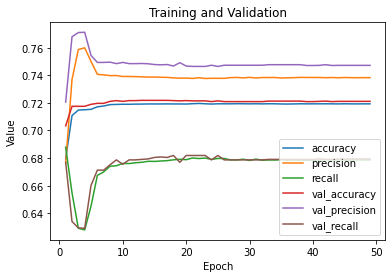

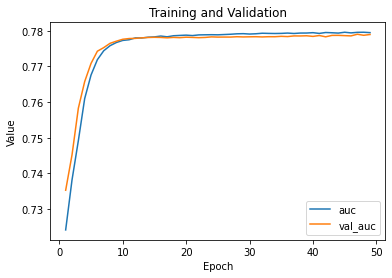

In [210]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 200
label_name = "cardio"
# classification_threshold = 0.6
my_validation_split = 0.1


# Establish the metrics the model will measure.
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc'),
          ]

# Establish the model's topography.
my_model_5 = build_model_NN_classification(learning_rate, buckets_feature_layer_nn1, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model_5, train, epochs, 
                           label_name, batch_size, my_validation_split)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy', "precision", "recall", "val_accuracy", "val_precision", "val_recall"]

plot_curve(epochs, hist, list_of_metrics_to_plot)
plot_curve(epochs, hist, ['auc', 'val_auc'])

In [211]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model_5.evaluate(x = features, y = label, batch_size=batch_size)

70/70 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7159 - precision: 0.7339 - recall: 0.6719 - auc: 0.7726


[0.5712125301361084,
 0.7159368395805359,
 0.7339015007019043,
 0.6718682050704956,
 0.7726190686225891]